In [1]:

#%load_ext line_profiler
#%load_ext memory_profilerhttp://localhost:8888/notebooks/general_reading_and_development.ipynb#
%load_ext autoreload
%autoreload 2
import imgread

imgread.__version__
import imgread.read as ir

#import skimage.io
#import matplotlib
#import matplotlib.pyplot as plt
#%matplotlib inline
lif = "../tests/data/2015Aug28_TransHXB2_50min+DMSO.lif"
img_tile = "../tests/data/t4_1.tif"
img = "../tests/data/exp2_2.tif"

mcts = "../tests/data/multi-channel-time-series.ome.tif"
nd2 = "/home/dan/pims/pims/tests/data/bioformats/cluster.nd2"



#import pims

In [2]:
import pims

In [199]:
fs = pims.Bioformats(img_tile, series=10)

In [217]:
fs.default_coords['c']=3
f = fs.get_frame(2)

In [203]:
f[120,200]

19655

In [191]:
fs.bundle_axes, fs.frame_shape, fs.frame_metadata

(['y', 'x'],
 (256, 512),
 {'t_s': 'PlaneDeltaT',
  'x_um': 'PlanePositionX',
  'y_um': 'PlanePositionY',
  'z_um': 'PlanePositionZ'})

**I really like the frame metadata t_s, x_um, y_um and z_um.
Every array (2D, 3D, ..., nD) having those metadata in common are contained in the Frame obj: a numpy array with metadata(dict) and frame_no(int).**

Are fs.bundle_axes (fs.frame_shape), fs.iter_axes and fs.default_coords overcomplicated?

Anyway: iter=0 == iter=n which is at least unexpected.

TODO:
to get plane index within pixels (multidim array)

In [248]:
m.PlaneCount(1), m.PlaneTheC(14, 11), m.PlaneTheT(14, 11), m.PixelsDimensionOrder(14)  # rdr.gerIndex(0,3,2) fisso Z,C,T

(12, 3, 2, 'XYCTZ')

In [218]:
f.metadata

{'frame': 11,
 'series': 10,
 'mpp': 0.1333333,
 'mppZ': 1000.0,
 'x': 0,
 'y': 0,
 'c': 3,
 't': 2,
 't_s': 57.62816,
 'x_um': 44.3247,
 'y_um': 79.14661,
 'z_um': 21.067,
 'axes': ['y', 'x'],
 'coords': {'c': 3, 't': 2}}

In [176]:
fs.iter_axes = 'ct'

In [177]:
fs.default_coords['c'] = 1

In [182]:
fs.get_frame(1)[100,100]

4280

In [4]:
ir.ensure_VM()
md, _ =ir.read(img_tile)

In [2]:
ir.read3(img)

Neither int nor float value to convert false.
Neither int nor float value to convert false.


AttributeError: 'NoneType' object has no attribute 'find_class'

In [53]:
md, _ = ir.read_pims(lif)

In [54]:
md

{'SizeS': 5,
 'Format': 'Leica Image File Format',
 'series': [{'SizeZ': 41,
   'PositionXYZ': {(0.0434916298968, 0.0082344989076, 0.0)}},
  {'SizeZ': 40, 'PositionXYZ': {(0.0434572221804, 0.008291016, 0.0)}},
  {'SizeZ': 43, 'PositionXYZ': {(0.04336546827, 0.008319689097, 0.0)}},
  {'SizeZ': 39, 'PositionXYZ': {(0.0438492490536, 0.0082767139974, 0.0)}},
  {'SizeZ': 37, 'PositionXYZ': {(0.0439142644374, 0.007778354844, 0.0)}}],
 'Date': '2015-08-28T08:10:37',
 'SizeX': 512,
 'SizeY': 512,
 'SizeC': 3,
 'SizeT': 1,
 'PhysicalSizeX': 0.080089,
 'PhysicalSizeY': 0.080089,
 'PhysicalSizeZ': 0.2964,
 'pixel_type': 'u1'}

In [49]:
ir.tidy_metadata(md)

In [50]:
md

{'SizeS': 15,
 'Format': 'OME-TIFF',
 'series': [{'PositionXYZ': {(44.25643, 79.04421, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.04421, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.04421, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.07835, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.07835, 21.067)}},
  {'PositionXYZ': {(44.25643, 79.07835, 21.067)}},
  {'PositionXYZ': {(44.25643, 79.11248, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.11248, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.11248, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.14661, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.14661, 21.067)}},
  {'PositionXYZ': {(44.25643, 79.14661, 21.067)}},
  {'PositionXYZ': {(44.25643, 79.18075, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.18075, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.18075, 21.067)}}],
 'pixel_type': '<u2',
 'Date': '2016-06-24T10:40:22',
 'SizeX': 512,
 'SizeY': 256,
 'SizeC': 4,
 'SizeT': 3,
 'SizeZ': 1,
 'PhysicalSizeX': 0.133333,
 'PhysicalSizeY': 0.133333,
 'PhysicalSiz

In [2]:
ir.ensure_VM()
ir.read(img_tile)

({'SizeS': 15,
  'Format': 'OME-TIFF',
  'series': [{'PositionXYZ': {(44.25643, 79.04421, 21.067)}},
   {'PositionXYZ': {(44.3247, 79.04421, 21.067)}},
   {'PositionXYZ': {(44.39296, 79.04421, 21.067)}},
   {'PositionXYZ': {(44.39296, 79.07835, 21.067)}},
   {'PositionXYZ': {(44.3247, 79.07835, 21.067)}},
   {'PositionXYZ': {(44.25643, 79.07835, 21.067)}},
   {'PositionXYZ': {(44.25643, 79.11248, 21.067)}},
   {'PositionXYZ': {(44.3247, 79.11248, 21.067)}},
   {'PositionXYZ': {(44.39296, 79.11248, 21.067)}},
   {'PositionXYZ': {(44.39296, 79.14661, 21.067)}},
   {'PositionXYZ': {(44.3247, 79.14661, 21.067)}},
   {'PositionXYZ': {(44.25643, 79.14661, 21.067)}},
   {'PositionXYZ': {(44.25643, 79.18075, 21.067)}},
   {'PositionXYZ': {(44.3247, 79.18075, 21.067)}},
   {'PositionXYZ': {(44.39296, 79.18075, 21.067)}}],
  'PhysicalSizeX': 0.133333,
  'PhysicalSizeY': 0.133333,
  'PhysicalSizeZ': 1000.0,
  'SizeX': 512,
  'SizeY': 256,
  'SizeC': 4,
  'SizeZ': 1,
  'SizeT': 3,
  'Bits': 16,
  

In [184]:
ir.read_pims(lif)

({'SizeS': 5,
  'Format': 'Leica Image File Format',
  'series': [{'SizeZ': 41,
    'PositionXYZ': {(0.0434916298968, 0.0082344989076, 0.0)}},
   {'SizeZ': 40, 'PositionXYZ': {(0.0434572221804, 0.008291016, 0.0)}},
   {'SizeZ': 43, 'PositionXYZ': {(0.04336546827, 0.008319689097, 0.0)}},
   {'SizeZ': 39, 'PositionXYZ': {(0.0438492490536, 0.0082767139974, 0.0)}},
   {'SizeZ': 37, 'PositionXYZ': {(0.0439142644374, 0.007778354844, 0.0)}}],
  'Date': '2015-08-28T08:10:37',
  'SizeX': 512,
  'SizeY': 512,
  'SizeC': 3,
  'SizeT': 1,
  'PhysicalSizeX': 0.080089,
  'PhysicalSizeY': 0.080089,
  'PhysicalSizeZ': 0.2964,
  'pixel_type': 'u1'},
 None)

In [5]:
import pickle

with open("pims.md.field.pickle", "wb") as f:
    pickle.dump(im.metadata.fields, f)
            
len(im.metadata.fields)

139

In [2]:
import pickle

with open("pims.md.field.pickle", "rb") as f:
    readlist = pickle.load(f)
            

readlist

['ArcID',
 'ArcManufacturer',
 'ArcModel',
 'ArcPower',
 'ArcType',
 'BooleanAnnotationCount',
 'ChannelAcquisitionMode',
 'ChannelAnnotationRefCount',
 'ChannelCount',
 'ChannelID',
 'ChannelIlluminationType',
 'ChannelLightSourceSettingsAttenuation',
 'ChannelLightSourceSettingsID',
 'ChannelLightSourceSettingsWavelength',
 'ChannelSamplesPerPixel',
 'CommentAnnotationCount',
 'DatasetCount',
 'DetectorAnnotationRefCount',
 'DetectorCount',
 'DetectorID',
 'DetectorManufacturer',
 'DetectorModel',
 'DetectorSettingsBinning',
 'DetectorSettingsGain',
 'DetectorSettingsID',
 'DetectorType',
 'DichroicCount',
 'DoubleAnnotationCount',
 'ExperimentCount',
 'ExperimentDescription',
 'ExperimentExperimenterRef',
 'ExperimentID',
 'ExperimentType',
 'ExperimenterAnnotationRefCount',
 'ExperimenterCount',
 'ExperimenterGroupCount',
 'ExperimenterID',
 'FileAnnotationCount',
 'FilterAnnotationRefCount',
 'FilterCount',
 'FilterID',
 'FilterManufacturer',
 'FilterModel',
 'FilterSetCount',
 'I

In [6]:
md = im.metadata
md.PixelsBinDataBigEndian(0,100000)

False

In [4]:

from six.moves.urllib.request import urlopen
import hashlib, os

url = ('http://downloads.openmicroscopy.org/bio-formats/' + '5.9.0' +
           '/artifacts/loci_tools.jar')
loc = "."
path = os.path.join(loc, 'loci_tools.jar')
loci_tools = urlopen(url).read()
sha1_checksum = urlopen(url + '.sha1').read().split(b' ')[0].decode()

downloaded = hashlib.sha1(loci_tools).hexdigest()
if downloaded != sha1_checksum:
    raise IOError("Downloaded loci_tools.jar has invalid checksum. " 
              "Please try again.")

with open(path, 'wb') as output:
    output.write(loci_tools)


In [2]:
# esperimento jpype direttamente
import jpype

#loci_path = '/home/dan/.venvs/imgread-dev/lib/python3.6/site-packages/pims/loci_tools.jar'
#loci_path = '/home/dan/.progs/bftools/bioformats_package.jar'
loci_path = './loci_tools.jar'

java_memory = '512m'
jpype.startJVM(jpype.getDefaultJVMPath(), '-ea', '-Djava.class.path=' + loci_path, '-Xmx' + java_memory)


loci = jpype.JPackage('loci')
#rdr = loci.formats.ChannelSeparator(loci.formats.ChannelFiller())
rdr = loci.formats.ImageReader()        
rdr.setMetadataStore(loci.formats.MetadataTools.createOMEXMLMetadata())



In [3]:
#%%timeit
rdr.setId(img_tile)
meta = rdr.getMetadataStore()
#md, mdd = ir.get_md_dict(meta, filepath=img_tile)

In [4]:
rdr.getIndex(0,3,2)

11

In [76]:
%%timeit

arr = np.frombuffer(rdr.openBytes(rdr.getIndex(0,0,1))[:], dtype=dtype)
ars = arr.reshape(256, 512)

#plt.imshow(ars)


721 µs ± 19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [58]:
import bioformats

In [7]:
bioformats.ImageReader(path=img_tile, perform_init=False)


NameError: name 'bioformats' is not defined

In [114]:
def _jbytearr_javacasting(arr, dtype, bpp, fp, little_endian):
    # let java do the type conversion
    Jconv = loci.common.DataTools.makeDataArray(arr, bpp, fp, little_endian)
    return np.array(Jconv[:], dtype=dtype)


In [5]:
# Checkout reader dtype and define read mode
isLittleEndian = rdr.isLittleEndian()
LE_prefix = ['>', '<'][isLittleEndian]

FormatTools = loci.formats.FormatTools
_dtype_dict = {FormatTools.INT8: 'i1',
                            FormatTools.UINT8: 'u1',
                            FormatTools.INT16: LE_prefix + 'i2',
                            FormatTools.UINT16: LE_prefix + 'u2',
                            FormatTools.INT32: LE_prefix + 'i4',
                            FormatTools.UINT32: LE_prefix + 'u4',
                            FormatTools.FLOAT: LE_prefix + 'f4',
                            FormatTools.DOUBLE: LE_prefix + 'f8'}
_dtype_dict_java = {}

for loci_format in _dtype_dict.keys():
    _dtype_dict_java[loci_format] = \
                (FormatTools.getBytesPerPixel(loci_format),
                 FormatTools.isFloatingPoint(loci_format),
                 isLittleEndian)


In [117]:
import numpy as np
dd = rdr.openBytes(1)
_jbytearr_javacasting(dd, rdr.pixelType, )

TypeError: _jbytearr_javacasting() missing 3 required positional arguments: 'bpp', 'fp', and 'little_endian'

In [6]:
# determine pixel type
pixel_type = rdr.getPixelType()
dtype = _dtype_dict[pixel_type]
java_dtype = _dtype_dict_java[pixel_type]
a_jbytearr_javacasting = lambda arr: _jbytearr_javacasting(arr, dtype, *java_dtype)
        

In [140]:
a_jbytearr_javacasting(rdr.openBytes(0)).shape

(131072,)

In [14]:
        self._jbytearr_stringbuffer = \
            lambda arr: _jbytearr_stringbuffer(arr, dtype)
        self._pixel_type = dtype

loci.formats.ReaderWrapper(rdr.reopenFile(path=''))

RuntimeError: No matching overloads found for [init in find. at native/common/jp_method.cpp:127

In [3]:
meta.getPixelsBinDataBigEndian(0,1000)

NameError: name 'meta' is not defined

In [10]:
rdr.getSizeX()

512

In [3]:
ir.ensure_VM()

In [4]:
md, wr = ir.read(img_tile)

In [7]:
%%timeit
wr.read()

7.33 ms ± 283 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
rw = loci.formats.ImageReader()
rw.reader = rdr

AttributeError: can't set attribute

In [4]:

reader = rdr.reader
#reader=

cs = loci.formats.ChannelSeparator(rdr.reader)
fs = loci.formats.Memoizer(rdr.reader)





java.lang.IllegalStateExceptionPyRaisable: java.lang.IllegalStateException: Current file should not be null; call setId(String) first

In [46]:
v = meta.getPixelsPhysicalSizeY(0)
v.value(), v.unit, ir.convert_value(v)

(0.1333333,
 'Match report for method unit, has 1 overloads.\n  Lome/units/unit/Unit; () ==> NONE\n',
 (0.1333333, 'µm'))

In [40]:
wrapper = loci.bioformats.formatreader.ImageReader
    #wrapper.
    rdr = image_reader
wrapper(path=img_tile, perform_init=False)


TypeError: Package loci.bioformats.formatreader.ImageReader is not Callable

In [8]:


ss = set(list(md.keys())).intersection(set(readlist))
sd = set(list(md.keys())).difference(set(readlist))

sd, 'FolderCount' in md.keys()




(set(), False)

In [47]:
fmd = rdr.getGlobalMetadata()



<jpype._jclass.java.util.Collections$EmptyEnumeration at 0x7f05a966b358>

In [9]:
len(readlist), len(md.keys()), len(set(readlist)), len(set(md.keys())), set(readlist) - ss, set(md.keys()) - ss

(139, 137, 139, 137, {'PixelsBinDataBigEndian', 'XMLAnnotationValue'}, set())

In [39]:
len(readlist), len(md.keys()), len(set(readlist)), len(set(md.keys())), set(readlist) - ss, set(md.keys()) - ss

(139,
 138,
 139,
 138,
 {'PixelsBinDataBigEndian', 'XMLAnnotationValue'},
 {'FolderCount'})

In [4]:
md, mdd = ir.read2(img_tile,)

In [10]:
set(readlist)- set(md), set(md) - set(readlist)

({'PixelsBinDataBigEndian', 'XMLAnnotationValue'}, {'FolderCount', 'Format'})

In [31]:
md.keys(), readlist, md['FolderCount']

(dict_keys(['ArcID', 'ArcManufacturer', 'ArcModel', 'ArcPower', 'ArcType', 'BooleanAnnotationCount', 'ChannelAcquisitionMode', 'ChannelAnnotationRefCount', 'ChannelCount', 'ChannelID', 'ChannelIlluminationType', 'ChannelLightSourceSettingsAttenuation', 'ChannelLightSourceSettingsID', 'ChannelLightSourceSettingsWavelength', 'ChannelSamplesPerPixel', 'CommentAnnotationCount', 'DatasetCount', 'DetectorAnnotationRefCount', 'DetectorCount', 'DetectorID', 'DetectorManufacturer', 'DetectorModel', 'DetectorSettingsBinning', 'DetectorSettingsGain', 'DetectorSettingsID', 'DetectorType', 'DichroicCount', 'DoubleAnnotationCount', 'ExperimentCount', 'ExperimentDescription', 'ExperimentExperimenterRef', 'ExperimentID', 'ExperimentType', 'ExperimenterAnnotationRefCount', 'ExperimenterCount', 'ExperimenterGroupCount', 'ExperimenterID', 'FileAnnotationCount', 'FilterAnnotationRefCount', 'FilterCount', 'FilterID', 'FilterManufacturer', 'FilterModel', 'FilterSetCount', 'FolderCount', 'ImageAcquisitionDat

In [21]:
rdr, xml_md = ir.img_reader(img_tile)

In [20]:
[(k,v) for k,v in mdd.items() if k[:9] == 'getPixels']

[('getPixelsSizeX', 'Found'),
 ('getPixelsSizeY', 'Found'),
 ('getPixelsSizeT', 'Found'),
 ('getPixelsSizeZ', 'Found'),
 ('getPixelsSizeC', 'Found'),
 ('getPixelsBigEndian', 'Found'),
 ('getPixelsBinDataCount', 'Found'),
 ('getPixelsType', 'Found'),
 ('getPixelsDimensionOrder', 'Found'),
 ('getPixelsSignificantBits', 'Found'),
 ('getPixelsBinData', 'Jmiss'),
 ('getPixelsBinDataCompression', 'Jmiss'),
 ('getPixelsBinDataLength', 'Jmiss'),
 ('getPixelsID', 'Found'),
 ('getPixelsInterleaved', 'Found'),
 ('getPixelsPhysicalSizeX', 'Found'),
 ('getPixelsPhysicalSizeY', 'Found'),
 ('getPixelsPhysicalSizeZ', 'Found'),
 ('getPixelsTimeIncrement', 'None')]

In [25]:
%%timeit
md, mdd = ir.get_md_dict(xml_md, img_tile)

9.2 s ± 150 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
class MetadataRetrieve(object):
    """This class is an interface to loci.formats.meta.MetadataRetrieve. At
    initialization, it tests all the MetadataRetrieve functions and it only
    binds the ones that do not raise a java exception.

    Parameters
    ----------
    jmd: jpype._jclass.loci.formats.ome.OMEXMLMetadataImpl
        java MetadataStore, instanciated with:
            jmd = loci.formats.MetadataTools.createOMEXMLMetadata()
        and coupled to reader with `rdr.setMetadataStore(metadata)`

    Methods
    ----------
    <loci.formats.meta.MetadataRetrieve.function>(*args) : float or int or str
        see loci.formats.meta.MetadataRetrieve API on openmicroscopy.org
    """
    def __init__(self, md):
        def wrap_md(fn, name=None, paramcount=None, *args):
            if len(args) != paramcount:
                # raise sensible error for wrong number of arguments
                raise TypeError(('{0}() takes exactly {1} arguments ({2} ' +
                                 'given)').format(name, paramcount, len(args)))
            field = fn(*args)

            # deal with fields wrapped in a custom metadata type
            if hasattr(field, 'value'):
                field = field.value
            try:  # some fields have to be called
                field = field()
            except TypeError:
                pass

            # check if it is already casted to a python type by jpype
            if not hasattr(field, 'toString'):
                return field
            else:
                field = field.toString()

            # convert to int or float if possible
            try:
                return int(field)
            except ValueError:
                try:
                    return float(field)
                except ValueError:
                    return field

        self.fields = []

        for name in dir(md):
            if (name[:3] != 'get') or (name in ['getRoot', 'getClass']):
                continue
            fn = getattr(md, name)
            for paramcount in range(5):
                try:
                    field = fn(*((0,) * paramcount))
                    if field is None:
                        continue
                    # If there is no exception, wrap the function and bind.
                    def fnw(fn1=fn, naame=name, paramcount=paramcount):
                        return (lambda *args: wrap_md(fn1, naame,
                                                      paramcount, *args))
                    fnw = fnw()
                    fnw.__doc__ = ('loci.formats.meta.MetadataRetrieve.' +
                                   name + ' wrapped\nby JPype and an '
                                   'additional automatic typeconversion.\n\n')
                    setattr(self, name[3:], fnw)
                    self.fields.append(name[3:])
                    continue
                except:
                    # function is not supported by this specific reader
                    pass

    def __repr__(self):
        return '<MetadataRetrieve> Available loci.formats.meta.' + \
               'MetadataRetrieve functions: ' + ', '.join(self.fields)



In [16]:
mdr.PlaneDeltaT(0,0)

0.21578

In [10]:
mdr = MetadataRetrieve(meta)
mdr.ChannelAcquisitionMode(0,0)

'WideField'

In [19]:
c = meta.getPixelsBinDataBigEndian(0,10000)
ir.convert_value(c.value)

False

In [5]:
ir.get_allvalues_grouped(meta, 'getPixelsBigEndian', 1,True)

Neither int nor float value to convert false.


[((0,),
  (<jpype._jclass.java.lang.Boolean at 0x7fcb6d797b00>, 'unknown', 'un'))]

In [21]:
md, mdd = ir.get_md_dict(meta)
len(md)


getBooleanAnnotationCount
getChannelAcquisitionMode
getChannelAnnotationRefCount
getChannelCount
getChannelID
getChannelIlluminationType
getChannelLightSourceSettingsID
getChannelLightSourceSettingsWavelength
getChannelSamplesPerPixel
getCommentAnnotationCount
getDatasetCount
getDetectorAnnotationRefCount
getDetectorCount
getDetectorID
getDetectorManufacturer
getDetectorModel
getDetectorSettingsBinning
getDetectorSettingsID
getDetectorType
getDichroicCount
getDoubleAnnotationCount
getExperimentCount
getExperimentDescription
getExperimentExperimenterRef
getExperimentID
getExperimentType
getExperimenterAnnotationRefCount
getExperimenterCount
getExperimenterEmail
getExperimenterFirstName
getExperimenterGroupCount
getExperimenterID
getExperimenterInstitution
getExperimenterLastName
getExperimenterUserName
getFileAnnotationCount
getFilterAnnotationRefCount
getFilterCount
getFilterID
getFilterManufacturer
getFilterModel
getFilterSetCount
getImageAcquisitionDate
getImageAnnotationRefCount
get

149

In [ ]:
import javabridge
import bioformats

javabridge.start_vm(class_path=bioformats.JARS)

In [4]:
imgread.__version__

'0.2.1.post0.dev14+ge9ad2f3'

In [54]:
%%timeit
im.metadata.PlaneDeltaT(0,7)

54.7 µs ± 299 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [86]:
im = pims.open(img_tile)
im.get_frame(3)

SyntaxError: invalid syntax (<ipython-input-86-628bc40cb297>, line 1)

In [22]:
rdr, xml_md = ir.img_reader("/home/dan/pims/pims/tests/data/bioformats/cluster.nd2")

ht = rdr.getGlobalMetadata()




In [3]:
md, wr = ir.read2("/home/dan/pims/pims/tests/data/bioformats/cluster.nd2")
md

{'DetectorType': [((0, 0), 'Other')],
 'ImageCount': [((), 1)],
 'ImageName': [((0,), 'cluster.nd2 (series 1)')],
 'PlateCount': [((), 0)],
 'PixelsSizeX': [((0,), 38)],
 'PixelsSizeY': [((0,), 31)],
 'PixelsSizeT': [((0,), 1)],
 'PixelsSizeZ': [((0,), 1)],
 'PixelsSizeC': [((0,), 2)],
 'PixelsBigEndian': [((0,), False)],
 'PixelsBinDataCount': [((0,), 0)],
 'PixelsType': [((0,), 'uint16')],
 'PixelsDimensionOrder': [((0,), 'XYCZT')],
 'PixelsSignificantBits': [((0,), 12)],
 'DetectorCount': [((0,), 1)],
 'DichroicCount': [((0,), 0)],
 'ChannelCount': [((0,), 2)],
 'DatasetCount': [((), 0)],
 'LightSourceCount': [((0,), 0)],
 'InstrumentAnnotationRefCount': [((0,), 0)],
 'ObjectiveAnnotationRefCount': [((0, 0), 0)],
 'DetectorAnnotationRefCount': [((0, 0), 0)],
 'ChannelAnnotationRefCount': [((0, 1), 0)],
 'PlaneAnnotationRefCount': [((0, 1), 0)],
 'LightPathAnnotationRefCount': [((0, 1), 0)],
 'ImageAnnotationRefCount': [((0,), 0)],
 'LightPathEmissionFilterRefCount': [((0, 1), 0)],
 

In [137]:
im = pims.Bioformats("/home/dan/pims/pims/tests/data/bioformats/cluster.nd2", meta=True)

md = im.get_metadata_raw()

md

{'m_dLightIrisIntensity0': '0.0',
 'TNDD4ChannelDyeName': '<<Blank>>',
 'CH2LaserShutter': '1',
 'dObjCalibration1to1': '0.0',
 'CH2CLEMEnoughSignalThreshold': '2000',
 'm_sMicroscopeKey': 'Microscope',
 'TNDD3ChannelLaserIndex': '-110',
 'm_iPFSState': '0',
 'wsCommandBeforeLoop': '',
 'm_ibFilterExist0': '1',
 'uiDenom': '1',
 'wsRDKey': 'Camera_TDPMTHighVoltage',
 'CH3ChannelLaserIndex': '-104',
 'm_dZoomPosition': '1.0',
 'CH3LaserShutter': '1',
 'm_sXYPhysFullName0': 'Nikon Ti',
 'SLxImageAttributes': '13',
 'EmWavelength': '700',
 '{Second Filter Cube} #3': '525/50',
 'm_ibLightExist0': '1',
 '{Second Filter Cube} #2': '525/50',
 'Y position for position #60': 'ome.units.quantity.Length: value[-4155.462732842248], unit[reference frame] stored as java.lang.Double',
 '{Second Filter Cube} #1': '525/50',
 'AverageCH': '',
 'm_sActiveShutterKey4': '',
 'm_sActiveShutterKey3': '',
 'm_sMicroscopePhysShortName': 'Ti Microscope',
 'm_sActiveShutterKey2': '',
 'm_sActiveShutterKey1': '',

In [6]:
%%timeit
img_rdr, mdata = ir.img_reader(img)
#img_rdr.getFormat(), img_rdr.getSeriesCount()

190 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
md

{'ImageCount': [((), 1)],
 'ArcType': [((0, 0), 'Xe')],
 'DetectorType': [((0, 0), 'CCD')],
 'ExperimentType': [((0,), 'FourDPlus')],
 'MicroscopeType': [((0,), 'Inverted')],
 'PlateCount': [((), 1)],
 'PixelsSizeX': [((0,), 1600)],
 'PixelsSizeY': [((0,), 1200)],
 'PixelsSizeT': [((0,), 81)],
 'PixelsSizeZ': [((0,), 1)],
 'PixelsSizeC': [((0,), 2)],
 'PixelsBigEndian': [((0,), False)],
 'PixelsBinDataCount': [((0,), 0)],
 'PixelsType': [((0,), 'uint16')],
 'PixelsDimensionOrder': [((0,), 'XYCTZ')],
 'PixelsSignificantBits': [((0,), 12)],
 'ShapeType': [((13, 0), 'Polygon')],
 'ShapeCount': [((13,), 1)],
 'DetectorCount': [((0,), 1)],
 'DichroicCount': [((0,), 0)],
 'ChannelCount': [((0,), 2)],
 'DatasetCount': [((), 0)],
 'XMLAnnotationAnnotationCount': [((0,), 0)],
 'LightSourceType': [((0, 0), 'Arc'), ((0, 1), 'LightEmittingDiode')],
 'LightSourceCount': [((0,), 2)],
 'LightSourceAnnotationRefCount': [((0, 1), 0)],
 'InstrumentAnnotationRefCount': [((0,), 0)],
 'ObjectiveAnnotationR

In [6]:
md, mdd = ir.get_md_dict(mdata, debug=True)
md

{'ImageCount': [((), (1, int, 'v'))],
 'ArcType': [((0, 0), ('Xe', str, 'gV'))],
 'DetectorType': [((0, 0), ('CCD', str, 'gV'))],
 'ExperimentType': [((0,), ('FourDPlus', str, 'gV'))],
 'MicroscopeType': [((0,), ('Inverted', str, 'gV'))],
 'PlateCount': [((), (1, int, 'v'))],
 'PixelsSizeX': [((0,), (1600, int, 'gVc'))],
 'PixelsSizeY': [((0,), (1200, int, 'gVc'))],
 'PixelsSizeT': [((0,), (81, int, 'gVc'))],
 'PixelsSizeZ': [((0,), (1, int, 'gVc'))],
 'PixelsSizeC': [((0,), (2, int, 'gVc'))],
 'PixelsBigEndian': [((0,), (False, bool, 'v'))],
 'PixelsBinDataCount': [((0,), (0, int, 'v'))],
 'PixelsType': [((0,), ('uint16', str, 'gV'))],
 'PixelsDimensionOrder': [((0,), ('XYCTZ', str, 'gV'))],
 'PixelsSignificantBits': [((0,), (12, int, 'gVc'))],
 'DetectorCount': [((0,), (1, int, 'v'))],
 'ShapeType': [((13, 0), ('Polygon', str, 'v'))],
 'ShapeCount': [((13,), (1, int, 'v'))],
 'DichroicCount': [((0,), (0, int, 'v'))],
 'ChannelCount': [((0,), (2, int, 'v'))],
 'ExperimentDescription':

In [67]:
%%time
md, mdd = ir.get_md_dict(mdata)

CPU times: user 9.4 s, sys: 36.6 ms, total: 9.44 s
Wall time: 7.85 s


In [51]:
from imgread.read import convert_value

In [101]:
%%timeit
#%lprun -f convert_value 
mdata.getPlaneDeltaT(0,0)

1.3 ms ± 295 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [78]:
root = mdata.getRoot()
im0 = root.getImage(0)
pixels = im0.getPixels()



In [100]:
%%timeit 
plane = pixels.getPlane(3)

output = io.StringIO()
output.write(str(plane.getDeltaT()))
contents = output.getvalue()
output.close()

3.64 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [98]:
output = io.StringIO()
output.write(str(plane.getDeltaT()))
contents = output.getvalue()
output.close()
contents

'ome.units.quantity.Time: value[0.21578], unit[s] stored as java.lang.Double'

In [116]:
from imgread.read import _convert_num

In [120]:
%%timeit

[s[s.find("[")+1:s.find("]")] for s in contents.split(",")]


1.07 µs ± 4.86 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [76]:
%%timeit

import io

output = io.StringIO()
output.write(str(mdata.getLightPathExcitationFilterRef(0,0,0)))
contents = output.getvalue()
output.close()
contents

286 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [98]:

%%mprun

mctsmd, _ = ir.read(lif)


In [102]:

lifmd2, lifwr2, kk2 = ir.read2(mcts, True)

In [110]:
kk2

{'getImageCount': 'Found',
 'getArcType': 'Jmiss',
 'getDetectorType': 'Jmiss',
 'getExperimentType': 'Jmiss',
 'getFilamentType': 'Jmiss',
 'getFilterType': 'Jmiss',
 'getLaserType': 'Jmiss',
 'getMicrobeamManipulationType': 'Jmiss',
 'getMicroscopeType': 'Jmiss',
 'getImageName': 'Found',
 'getPlateCount': 'Found',
 'getPixelsSizeX': 'Found',
 'getPixelsSizeY': 'Found',
 'getPixelsSizeT': 'Found',
 'getPixelsSizeZ': 'Found',
 'getPixelsSizeC': 'Found',
 'getPixelsBigEndian': 'Found',
 'getPixelsBinDataCount': 'Found',
 'getPixelsBinDataBigEndian': 'Jmiss',
 'getPixelsType': 'Found',
 'getPixelsDimensionOrder': 'Found',
 'getPixelsSignificantBits': 'Found',
 'getDetectorCount': 'Jmiss',
 'getShapeType': 'Jmiss',
 'getDoubleAnnotationAnnotationCount': 'Jmiss',
 'getShapeCount': 'Jmiss',
 'getDichroicCount': 'Jmiss',
 'getChannelCount': 'Found',
 'getEllipseTransform': 'Jmiss',
 'getExperimentDescription': 'Jmiss',
 'getDatasetCount': 'Found',
 'getCommentAnnotationAnnotationCount': 'Jm

In [113]:

[(k,kk2[k]) for k in kk2 if kk2[k] == 'None']

[('getChannelAcquisitionMode', 'None'),
 ('getChannelColor', 'None'),
 ('getChannelContrastMethod', 'None'),
 ('getChannelEmissionWavelength', 'None'),
 ('getChannelExcitationWavelength', 'None'),
 ('getChannelFluor', 'None'),
 ('getChannelIlluminationType', 'None'),
 ('getChannelNDFilter', 'None'),
 ('getChannelName', 'None'),
 ('getChannelPinholeSize', 'None'),
 ('getChannelPockelCellSetting', 'None'),
 ('getImageAcquisitionDate', 'None'),
 ('getImageDescription', 'None'),
 ('getPixelsPhysicalSizeX', 'None'),
 ('getPixelsPhysicalSizeY', 'None'),
 ('getPixelsPhysicalSizeZ', 'None'),
 ('getPixelsTimeIncrement', 'None')]

In [6]:
%load_ext line_profiler
#%load_ext memory_profiler


In [8]:
%lprun -f ir.convert_value mctsmd2, _ = ir.read2(lif)

In [84]:
round(3.1234567,4)

3.1235

In [75]:
mctsmd

{'SizeS': 1,
 'Format': 'OME-TIFF',
 'PositionXYZ': set(),
 'Date': None,
 'Name': 'multi-channel-time-series',
 'Bits': 8,
 'SizeT': 7,
 'SizeZ': 1,
 'SizeC': 3,
 'SizeY': 167,
 'SizeX': 439,
 'PhysicalSizeZ': None,
 'PhysicalSizeY': None,
 'PhysicalSizeX': None}

In [33]:
md, missing_keys = ir.get_md_dict(mdata, img)

In [41]:
md['PixelsSizeZ']

[((0,), 41), ((1,), 40), ((2,), 43), ((3,), 39), ((4,), 37)]

In [56]:
md2, wr2 = ir.read2(img)

In [71]:
md2['PixelsSizeZ']

[((0,), 1)]

In [68]:
len (md2['PixelsSizeZ'])

1

In [69]:
lifmd, _ = ir.read(lif)

In [70]:
lifmd

{'SizeS': 5,
 'Format': 'Leica Image File Format',
 'series': [{'SizeZ': 41,
   'Name': 'Series001',
   'Date': '2015-08-28T10:10:37',
   'PositionXYZ': {(0.0434916298968, 0.0082344989076, 0.0)}},
  {'SizeZ': 40,
   'Name': 'Series004',
   'Date': '2015-08-28T10:23:49',
   'PositionXYZ': {(0.0434572221804, 0.008291016, 0.0)}},
  {'SizeZ': 43,
   'Name': 'Series007',
   'Date': '2015-08-28T10:37:47',
   'PositionXYZ': {(0.04336546827, 0.008319689097, 0.0)}},
  {'SizeZ': 39,
   'Name': 'Series009',
   'Date': '2015-08-28T10:51:18',
   'PositionXYZ': {(0.0438492490536, 0.0082767139974, 0.0)}},
  {'SizeZ': 37,
   'Name': 'Series011',
   'Date': '2015-08-28T11:04:05',
   'PositionXYZ': {(0.0439142644374, 0.007778354844, 0.0)}}],
 'PhysicalSizeX': 0.080245,
 'PhysicalSizeY': 0.080245,
 'PhysicalSizeZ': 0.2964,
 'SizeX': 512,
 'SizeY': 512,
 'SizeC': 3,
 'SizeT': 1,
 'Bits': 8}

In [15]:
metadata = mdata
class FoundMetadata(Exception): pass

md = {}
missing_keys = []
none_keys = []
javaexception_logfile = open("error.log", "w")
for i in range(len(ttt)):
    try:
        for npar in range(5):
            try:
                t = (0,)*npar
                k = ttt[i]
                v = getattr(metadata, k)(*t)
                raise FoundMetadata()
            except TypeError:
                continue
    except FoundMetadata:
        if v == None:
            none_keys.append(k[3:])
        else:
            # md[k] = [(npar, convertion(v))] # this get only the first value
            md[k[3:]] = ir.get_allvalues_grouped(metadata, k, npar)
    except Exception as e:
        missing_keys.append(k[3:])
        javaexception_logfile.write(str((k, type(e), e, "--", npar))+'\n')
        continue
javaexception_logfile.close()

print(len(md))
md

97


{'ImageCount': [((), 5)],
 'DetectorType': [((4, 2), 'PMT')],
 'LaserType': [((4, 5), 'Other')],
 'MicroscopeType': [((4,), 'Other')],
 'ImageName': [((0,), 'Series001'),
  ((1,), 'Series004'),
  ((2,), 'Series007'),
  ((3,), 'Series009'),
  ((4,), 'Series011')],
 'PlateCount': [((), 0)],
 'PixelsSizeX': [((4,), 512)],
 'PixelsSizeY': [((4,), 512)],
 'PixelsSizeT': [((4,), 1)],
 'PixelsSizeZ': [((0,), 41), ((1,), 40), ((2,), 43), ((3,), 39), ((4,), 37)],
 'PixelsSizeC': [((4,), 3)],
 'PixelsBigEndian': [((4,), False)],
 'PixelsBinDataCount': [((4,), 0)],
 'PixelsType': [((4,), 'uint8')],
 'PixelsDimensionOrder': [((4,), 'XYCZT')],
 'PixelsSignificantBits': [((4,), 8)],
 'DetectorCount': [((4,), 3)],
 'DichroicCount': [((4,), 0)],
 'ChannelCount': [((4,), 3)],
 'DatasetCount': [((), 0)],
 'LightSourceType': [((4, 5), 'Laser')],
 'LightSourceCount': [((4,), 6)],
 'LightSourceAnnotationRefCount': [((4, 5), 0)],
 'InstrumentAnnotationRefCount': [((4,), 0)],
 'ObjectiveAnnotationRefCount': 

In [16]:
missing_keys

['ArcType',
 'ExperimentType',
 'FilamentType',
 'MicrobeamManipulationType',
 'PixelsBinDataBigEndian',
 'ShapeType',
 'DoubleAnnotationAnnotationCount',
 'ShapeCount',
 'EllipseTransform',
 'ExperimentDescription',
 'CommentAnnotationAnnotationCount',
 'BooleanAnnotationAnnotationCount',
 'EllipseTheT',
 'EllipseTheZ',
 'FileAnnotationAnnotationCount',
 'ListAnnotationAnnotationCount',
 'LongAnnotationAnnotationCount',
 'MapAnnotationAnnotationCount',
 'TagAnnotationAnnotationCount',
 'TermAnnotationAnnotationCount',
 'TimestampAnnotationAnnotationCount',
 'XMLAnnotationAnnotationCount',
 'FolderAnnotationRefCount',
 'PlateAnnotationRefCount',
 'ExperimenterGroupAnnotationRefCount',
 'ScreenAnnotationRefCount',
 'ReagentAnnotationRefCount',
 'ExperimenterAnnotationRefCount',
 'DichroicAnnotationRefCount',
 'WellAnnotationRefCount',
 'PlateAcquisitionAnnotationRefCount',
 'ROIAnnotationRefCount',
 'ProjectAnnotationRefCount',
 'DatasetAnnotationRefCount',
 'ShapeAnnotationRefCount',
 

In [49]:
getattr(mdata, 'getChannelExcitationWavelength')(0,1)

Instance of ome.units.quantity.Length: ome.units.quantity.Length: value[543.0], unit[nm] stored as java.lang.Double

In [26]:
import pprint

with open("mydatafile.txt", 'w') as f:
    for k, v in md.items():
        if len(v) > 1:
            f.write("\n{:>34}\n{}".format(k, pprint.pformat(v, indent=35, width=110)))
        else:
            f.write("\n{:>34}\t{}".format(k, pprint.pformat(v[0])))
        #f.write(pprint.pformat(md[k]))

In [25]:
getattr(mdata, 'getLightPathEmissionFilterRef')(0,0,0)

'Filter:0:0'

In [55]:
metadata.getImageAcquisitionDate(0)

Instance of ome.xml.model.primitives.Timestamp: 2016-06-24T10:40:22

In [19]:
metadata.getPlanePositionX(0,0), metadata.getPlaneTheC(14,11)

(Instance of ome.units.quantity.Length: ome.units.quantity.Length: value[44.25643], unit[reference frame] stored as java.lang.Double,
 Instance of ome.xml.model.primitives.NonNegativeInteger: 3)

In [7]:
metadata.getPixelsPhysicalSizeX(14).value().doubleValue(), pixels.getPhysicalSizeX().value().doubleValue()

(0.1333333, 0.1333333)

In [113]:
wrapper = bioformats.formatreader.ImageReader(path=filepath, perform_init=False)
wrapper.rdr = rdr

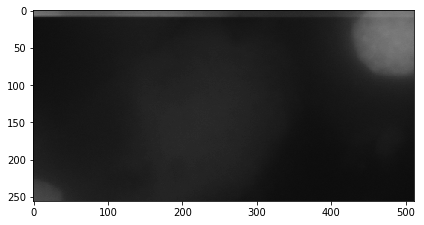

In [115]:
#%memit a = wrapper.read(c=2, t=0, series=4, z=21, rescale=False, wants_max_intensity=, XYWH=(,,,))
a, max_int = wrapper.read(c=1, t=0, series=0, z=0, rescale=False, wants_max_intensity=True)
# wrapper.read(c=2, t=0, series=4, z=21, rescale=False, wants_max_intensity=True, XYWH=(320,254,1,1))
#skimage.io.imshow(a)
#max_int
a, max_int, a.max()
skimage.io.imshow(a)

In [14]:
# The plane data isn't in the planes, it's in the tiff data
for idx in range(pixels.sizeOfPlaneList()):
    plane = pixels.getPlane(idx)
    c = plane.getTheC().getValue().intValue()
    t = plane.getTheT().getValue().intValue()
    print("TiffData: c=%d, t=%d" % (c, t))

TiffData: c=0, t=0
TiffData: c=1, t=0
TiffData: c=0, t=1
TiffData: c=1, t=1
TiffData: c=0, t=2
TiffData: c=1, t=2
TiffData: c=0, t=3
TiffData: c=1, t=3
TiffData: c=0, t=4
TiffData: c=1, t=4
TiffData: c=0, t=5
TiffData: c=1, t=5
TiffData: c=0, t=6
TiffData: c=1, t=6
TiffData: c=0, t=7
TiffData: c=1, t=7
TiffData: c=0, t=8
TiffData: c=1, t=8
TiffData: c=0, t=9
TiffData: c=1, t=9
TiffData: c=0, t=10
TiffData: c=1, t=10
TiffData: c=0, t=11
TiffData: c=1, t=11
TiffData: c=0, t=12
TiffData: c=1, t=12
TiffData: c=0, t=13
TiffData: c=1, t=13
TiffData: c=0, t=14
TiffData: c=1, t=14
TiffData: c=0, t=15
TiffData: c=1, t=15
TiffData: c=0, t=16
TiffData: c=1, t=16
TiffData: c=0, t=17
TiffData: c=1, t=17
TiffData: c=0, t=18
TiffData: c=1, t=18
TiffData: c=0, t=19
TiffData: c=1, t=19
TiffData: c=0, t=20
TiffData: c=1, t=20
TiffData: c=0, t=21
TiffData: c=1, t=21
TiffData: c=0, t=22
TiffData: c=1, t=22
TiffData: c=0, t=23
TiffData: c=1, t=23
TiffData: c=0, t=24
TiffData: c=1, t=24
TiffData: c=0, t=25


### XML
    getRoot is used in imgread-0.2.1

In [132]:
import imgread.read as ir
mdat, wr = ir.read(img_tile)
mdat

{'SizeS': 15,
 'Format': 'OME-TIFF',
 'series': [{'PositionXYZ': {(44.25643, 79.04421, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.04421, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.04421, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.07835, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.07835, 21.067)}},
  {'PositionXYZ': {(44.25643, 79.07835, 21.067)}},
  {'PositionXYZ': {(44.25643, 79.11248, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.11248, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.11248, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.14661, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.14661, 21.067)}},
  {'PositionXYZ': {(44.25643, 79.14661, 21.067)}},
  {'PositionXYZ': {(44.25643, 79.18075, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.18075, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.18075, 21.067)}}],
 'PhysicalSizeX': 0.133333,
 'PhysicalSizeY': 0.133333,
 'PhysicalSizeZ': 1000.0,
 'SizeX': 512,
 'SizeY': 256,
 'SizeC': 4,
 'SizeZ': 1,
 'SizeT': 3,
 'Bits': 16,
 'Name': None,
 'Date': '201

In [157]:
instrument = root.getInstrument(0)
detector = instrument.getDetector(0)
detector.getModel()

'Andor Ultra 897'

In [159]:
[m for m in root.methods if m[:3]=='get']

['getUUID',
 'getInstrument',
 'getImage',
 'getStructuredAnnotations',
 'getROI',
 'getFolder',
 'getPlate',
 'getExperimenterGroup',
 'getScreen',
 'getExperimenter',
 'getProject',
 'getDataset',
 'getExperiment',
 'getBinaryOnly',
 'getRights',
 'getCreator',
 'getClass']

In [180]:
image = root.getImage(14)
[m for m in image.methods if m[:3]=='get']

['getStageLabel',
 'getDescription',
 'getLinkedInstrument',
 'getLinkedExperimenterGroup',
 'getLinkedDataset',
 'getLinkedExperimenter',
 'getLinkedFolder',
 'getLinkedAnnotation',
 'getPixels',
 'getLinkedROI',
 'getImagingEnvironment',
 'getAcquisitionDate',
 'getLinkedExperiment',
 'getLinkedMicrobeamManipulation',
 'getObjectiveSettings',
 'getLinkedWellSample',
 'getName',
 'getID',
 'getClass']

In [229]:
obj = image.getObjectiveSettings()
[m for m in obj.methods if m[:3]=='get']
obj.getID()

'Objective:60XWater:02d4abc1-10b3-4040-9f9c-f584a7b9595f'

In [109]:
ch = pixels.getChannel(0)
[m for m in ch.methods if m[:3]=='get']

['getAcquisitionMode',
 'getContrastMethod',
 'getIlluminationType',
 'getEmissionWavelength',
 'getExcitationWavelength',
 'getSamplesPerPixel',
 'getPinholeSize',
 'getLinkedAnnotation',
 'getPixels',
 'getLightPath',
 'getColor',
 'getLinkedFilterSet',
 'getFluor',
 'getNDFilter',
 'getPockelCellSetting',
 'getDetectorSettings',
 'getLightSourceSettings',
 'getName',
 'getID',
 'getClass']

In [111]:
lp = ch.getLightPath()
[m for m in lp.methods if m[:3]=='get']

['getLinkedAnnotation',
 'getLinkedDichroic',
 'getLinkedEmissionFilter',
 'getLinkedExcitationFilter',
 'getClass']

In [122]:
ex = lp.getLinkedExcitationFilter(0)
[m for m in ex.methods if m[:3]=='get']

['getInstrument',
 'getLinkedAnnotation',
 'getFilterWheel',
 'getTransmittanceRange',
 'getLinkedFilterSetExcitationFilter',
 'getLinkedFilterSetEmissionFilter',
 'getLinkedLightPathExcitationFilter',
 'getLinkedLightPathEmissionFilter',
 'getType',
 'getID',
 'getLotNumber',
 'getManufacturer',
 'getModel',
 'getSerialNumber',
 'getClass']

In [123]:
ex.getID()

'Filter:f914c80d-556d-425f-b9d4-60097856fbac'

In [194]:
pixels = image.getPixels()
[m for m in pixels.methods if m[:3]=='get']

['getSizeX',
 'getSizeY',
 'getSizeC',
 'getSizeZ',
 'getSizeT',
 'getDimensionOrder',
 'getPhysicalSizeX',
 'getPhysicalSizeY',
 'getPhysicalSizeZ',
 'getPlane',
 'getTiffData',
 'getBinData',
 'getBigEndian',
 'getInterleaved',
 'getSignificantBits',
 'getTimeIncrement',
 'getMetadataOnly',
 'getType',
 'getChannel',
 'getID',
 'getClass']

In [208]:
pixels.getTimeIncrement()

In [219]:
plane = pixels.getPlane(11)
[m for m in plane.methods if m[:3]=='get']

['getExposureTime',
 'getPositionX',
 'getPositionY',
 'getPositionZ',
 'getLinkedAnnotation',
 'getPixels',
 'getTheC',
 'getTheT',
 'getTheZ',
 'getDeltaT',
 'getHashSHA1',
 'getClass']

In [220]:
plane.getTheC(), plane.getDeltaT(), plane.getExposureTime()

(Instance of ome.xml.model.primitives.NonNegativeInteger: 3,
 Instance of ome.units.quantity.Time: ome.units.quantity.Time: value[63.34547], unit[s] stored as java.lang.Double,
 Instance of ome.units.quantity.Time: ome.units.quantity.Time: value[1.0], unit[s] stored as java.lang.Double)

In [133]:
for k in root.methods:
    if k[:3] == 'get':
        print(k)

getUUID
getInstrument
getImage
getStructuredAnnotations
getROI
getFolder
getPlate
getExperimenterGroup
getScreen
getExperimenter
getProject
getDataset
getExperiment
getBinaryOnly
getRights
getCreator
getClass


In [52]:
root.getInstrument(0).getDetector(0).getModel()

'Andor Ultra 897'

In [16]:
metadata.getExperimentID(0)

'Experiment:19d309c2-f890-43ef-900e-7671c12e1a8f'

In [17]:
root.getExperiment(0)

Instance of ome.xml.model.Experiment: ome.xml.model.Experiment@341b71fb

In [18]:
im = root.getImage(0)
obj = im.getObjectiveSettings()
obj.getID(), obj.getMedium(), obj.getRefractiveIndex(), obj.getCorrectionCollar(), obj.getObjective()

('Objective:10XAir:8882c051-9fd3-4ee4-8049-5c38fe9ce2bc',
 None,
 None,
 None,
 None)

In [19]:
metadata.getObjectiveID(0,0) == obj.getID(), metadata.getObjectiveLensNA(0,0)

(True, Instance of java.lang.Double: 0.3)

## md vs root (to remember)

from md i can get info on camera, objetives ...

but also key parameters like exposuretime, DeltaT, planePositionXYZ

In [20]:

#might be used to check if metadata are the same for all series
(metadata.getObjectiveCount(0),
 metadata.getObjectiveImmersion(0, 0),
 metadata.getPixelsDimensionOrder(0),
 metadata.getPixelsPhysicalSizeX(0),
 #metadata.getTiffDataIFD(0, 5), only fei
 metadata.getObjectiveLensNA(0, 0),
 metadata.getChannelCount(0),
 metadata.getDetectorSettingsBinning(0,1), # serie, channel
 metadata.getDetectorModel(0,0),
 metadata.getDetectorType(0,0),
 metadata.getTiffDataCount(0),
 metadata.getPlaneExposureTime(0,1), #none.value() catch this error with try
 metadata.getPlaneDeltaT(0,2).value(),
 metadata.getPlaneDeltaT(0,33).value().doubleValue(),
 metadata.getPlanePositionX(0,0),
 metadata.getScreenCount(),
 #metadata.getXMLAnnotationCount(),
)
# cerca tutti i ...Count()

(4,
 Instance of ome.xml.model.enums.Immersion: Air,
 Instance of ome.xml.model.enums.DimensionOrder: XYCTZ,
 Instance of ome.units.quantity.Length: ome.units.quantity.Length: value[0.74], unit[µm] stored as java.lang.Double,
 Instance of java.lang.Double: 0.3,
 2,
 Instance of ome.xml.model.enums.Binning: 1x1,
 'QImaging Retiga 2000DC',
 Instance of ome.xml.model.enums.DetectorType: CCD,
 162,
 Instance of ome.units.quantity.Time: ome.units.quantity.Time: value[0.16], unit[s] stored as java.lang.Double,
 Instance of java.lang.Double: 6.21581,
 96.30042,
 Instance of ome.units.quantity.Length: ome.units.quantity.Length: value[0.417793], unit[reference frame] stored as java.lang.Double,
 0)

In [29]:
metadata.getXMLAnnotationValue(0) == metadata.getRoot().getStructuredAnnotations().getXMLAnnotation(0).getValue()

True

In [30]:
md = bioformats.get_omexml_metadata(lif)
from xml.etree import ElementTree as ETree
mdroot = ETree.fromstring(metadata.dumpXML())
mdroot = ETree.fromstring(metadata.getRoot().getStructuredAnnotations().getXMLAnnotation(0).getValue())
#mdroot = ETree.fromstring(md)

for a in mdroot:
    print((a.tag, a.attrib))
    for aa in a:
        print((" GGSSS ", aa.tag, aa.attrib))
        for aaa in aa:
            print((" GGSSS2 ", aaa.tag, aaa.attrib))

('LADisplayName', {'Name': 'Arosio'})
('AuxDevice', {'ID': 'Computer:BFEBFBFF000106A5', 'Manufacturer': 'Unknown', 'Model': 'Computer'})
('AuxDevice', {'ID': 'PolytropeIIYanus:18fc49b6-f28c-45d3-920a-20426bd336e1', 'Manufacturer': 'FEI Munich', 'Model': 'Polytrope II with Yanus'})
('AuxDevice', {'ID': 'HadrwareAutofocus:fdc9de9a-4977-49f3-9d00-45470ae7abcd', 'Manufacturer': 'Unknown', 'Model': 'Hardware Autofocus'})
('TubeRefractor', {'CamID': 'Detector:fbebcf78-372b-422c-a851-fa2390141e50', 'Factor': '2'})
('TubeRefractor', {'CamID': 'Detector:2ba613dc-f2d3-4942-b27e-1ad2e8f7d607', 'Factor': '1.002'})
('FilterDeviceDescription', {'ID': 'Microscope:f9c537de-6dc8-4c63-9949-669d05333b45', 'Name': 'iMIC with Imaging Control Unit'})
(' GGSSS ', 'FilterSliderDescription', {'Index': '0', 'Name': 'iMIC [Filters]'})
(' GGSSS2 ', 'FilterRef', {'ID': 'Filter:9999be3c-b023-4052-959d-b602e800a393'})
(' GGSSS2 ', 'FilterRef', {'ID': 'Filter:c4f14ec0-414c-475a-9dcb-b25ef3fb856c'})
(' GGSSS2 ', 'Filt

In [114]:
import xmltodict

m1 = xmltodict.parse(metadata.dumpXML())
m2 = xmltodict.parse(bioformats.get_omexml_metadata(img_tile))
m2['OME']


OrderedDict([('@xmlns', 'http://www.openmicroscopy.org/Schemas/OME/2016-06'),
             ('@xmlns:xsi', 'http://www.w3.org/2001/XMLSchema-instance'),
             ('@xsi:schemaLocation',
              'http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd'),
             ('Image',
              OrderedDict([('@ID', 'Image:0'),
                           ('@Name', 't4_1.tif'),
                           ('Description',
                            '&lt;Children&gt;;     &lt;count&gt;2&lt;/count&gt;;         &lt;Name&gt;Loop&lt;/Name&gt;;         &lt;Properties&gt;;           &lt;count&gt;7&lt;/count&gt;;           &lt;item_0&gt;;             &lt;name&gt;wellplate&lt;/name&gt;;             &lt;Relative&gt;False&lt;/Relative&gt;;             &lt;ForAnalysis&gt;False&lt;/ForAnalysis&gt;;           &lt;/item_0&gt;;           &lt;item_1&gt;;             &lt;name&gt;global_coordinates&lt;/name&gt;;               &lt;count&gt;1&lt;/count&g

In [32]:
metalist = [(child.tag, [[child.attrib]]) for child in ETree.fromstring(metadata.dumpXML()).iter()]

In [71]:
m = metalist[10]
m[0], m[1][0][0]

('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Arc',
 {'ID': 'LightSource:ff66e760-45e5-4bba-9d9a-c780080f3d01_0',
  'Manufacturer': 'FEI Munich',
  'Model': 'Oligochrome_0',
  'Power': '150.0',
  'PowerUnit': 'mW',
  'Type': 'Xe'})

In [24]:
for child in mdroot:
    if child.tag.endswith(''):
        for grandchild in child:
            print((grandchild.tag, grandchild.attrib))

('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Microscope', {'Model': 'TCS SP5', 'Type': 'Other'})
('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Laser', {'ID': 'LightSource:0:0', 'LaserMedium': 'Other', 'Type': 'Other', 'Wavelength': '458.0', 'WavelengthUnit': 'nm'})
('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Laser', {'ID': 'LightSource:0:1', 'LaserMedium': 'Other', 'Type': 'Other', 'Wavelength': '476.0', 'WavelengthUnit': 'nm'})
('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Laser', {'ID': 'LightSource:0:2', 'LaserMedium': 'Other', 'Type': 'Other', 'Wavelength': '488.0', 'WavelengthUnit': 'nm'})
('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Laser', {'ID': 'LightSource:0:3', 'LaserMedium': 'Other', 'Type': 'Other', 'Wavelength': '514.0', 'WavelengthUnit': 'nm'})
('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Laser', {'ID': 'LightSource:0:4', 'LaserMedium': 'Other', 'Type': 'Other', 'Wavelength': '543.0', 'WavelengthUnit': 'nm'})
('{http://www.o